In [ ]:
from subprocess import run

1. [10pts] Écrire une fonction ss2tuples(structure) qui prend en entrée une structure secondaire et retourne la liste des positions des paires de bases (la première position d’une séquence est 0).

In [ ]:
sequence = 'CGAUGCGCAUGCCGAUGCAU'

In [ ]:
output = run(['RNAfold'], input=sequence, capture_output=True, text=True)

In [ ]:
print(output.stdout)

CGAUGCGCAUGCCGAUGCAU
......((((....)))).. ( -4.00)



In [ ]:
output.stdout.split("\n")[1].split(" ")

['......((((....))))..', '(', '-4.00)']

In [ ]:
structure = output.stdout.split("\n")[1].split(" ")[0]
structure

'......((((....))))..'

In [ ]:
indices_left = [i for i, x in enumerate(structure) if x == "("]
indices_left

[6, 7, 8, 9]

In [ ]:
indices_right = [i for i, x in enumerate(structure) if x == ")"]
indices_right

[14, 15, 16, 17]

In [ ]:
def ss2tuples(structure):
    position_pairs = []
    # chercher tous les "("
    indices_left = [i for i, x in enumerate(structure) if x == "("]
    # chercher tous les ")"
    indices_right = [i for i, x in enumerate(structure) if x == ")"]
    # faire une validation 
    if len(indices_left) != len(indices_right):
        print("Cette structure n'est pas valide !")
        
    for j in range(len(indices_left)):
        #il faut inverser la liste de "indices_right"
        position_pairs.append((indices_left[j],indices_right[::-1][j]))
        
    return position_pairs
    

In [ ]:
ss2tuples('((((...))...))')

[(0, 13), (1, 12), (2, 8), (3, 7)]

2. [20pts] Écrire une fonction rna_distance(structure_1, structure_2)qui prend en entrée deux structures secondaires de même tailles, et retourne le nombre de paires de bases qu’il faut enlever puis rajouter pour passerd’une structure à l’autre. Ne pas utiliser d’autres programmes calculant déjà ce résultat (e.g. RNAdistance)

In [ ]:
structure_1 = "((((...))...))"
structure_2 = "((..........))"
structure_3 = "((((......))))"

In [ ]:
a = ss2tuples(structure_1)
a

[(0, 13), (1, 12), (2, 8), (3, 7)]

In [ ]:
b = ss2tuples(structure_2)
b

[(0, 13), (1, 12)]

In [ ]:
c = ss2tuples(structure_3)
c

[(0, 13), (1, 12), (2, 11), (3, 10)]

In [ ]:
n = 0 
if len(a) == len(c):
    for i in range(len(a)):
        if a[i] not in c[i]:
            n += 2
print(n)

4


In [ ]:
n = 0 
if len(a) > len(b):
    n += abs(len(a)-len(b))
    for i in range(len(b)):
        if a[i] not in c[i]:
            n += 2
print(n)

2


In [ ]:
def rna_distance(structure_1, structure_2):
    n = 0
    # comparer les positions des paires 
    a = ss2tuples(structure_1)
    b = ss2tuples(structure_2)
    if len(a) == len(b):
        for i in range(len(a)):
            if a[i] not in b:
                n += 2     # quand une position des paires ne marche pas, la distance équal 2
    
    else:
        # quand il manque une position des paires, la distance équal 1
        n += abs(len(a)-len(b))
        if len(a) < len(b):
            for i in range(len(a)):
                if a[i] not in b:
                    n += 2
        if len(a) > len(b):
            for i in range(len(b)):
                if b[i] not in a:
                    n += 2
                    
                    
    return n
    
    

In [ ]:
output = run(['RNAdistance','-DP'], input= str(structure_1)+ "\n" + str(structure_2), capture_output=True, text=True)

In [ ]:
print(output.stdout)

P: 2  



In [ ]:
output.stdout.split(" ")[1]

'2'

In [ ]:
def rna_distance_test(structure_1, structure_2):
    # RNAdistance 2.4.16
    output = run(['RNAdistance','-DP'], 
                 input= str(structure_1)+ "\n" + str(structure_2), 
                 capture_output=True, text=True)
    return output.stdout.split(" ")[1]    # sortie seulement le numero
    

In [ ]:
rna_distance('((((...))...))', '((..........))')

2

In [ ]:
rna_distance('((((...))...))', '((((......))))')

4

In [ ]:
x = "((((...))))....."
y = ".(...(((...))).)"

In [ ]:
ss2tuples(x)

[(0, 10), (1, 9), (2, 8), (3, 7)]

In [ ]:
ss2tuples(y)

[(1, 15), (5, 13), (6, 12), (7, 11)]

In [ ]:
rna_distance(x,y)

8

In [ ]:
rna_distance_test(x,y)

'8'

3. [60pts] Télécharger les alignements seed des familles RF00001 et RF00174 de RFAM en format Stockholm.

(a) [5pts] Pour chaque famille, quelle est la structure secondaire consensus?

(b) [25pts] Pour chaque séquence sans gaps, calculer avec RNAfold sa structure secondaire la plus stable (MFE) ainsi que son énergie. 
Produire une figure montrant la distribution de ces énergies, par famille. Indice: Bio.AlignIO

In [ ]:
from Bio import AlignIO

In [ ]:
align = AlignIO.read("RF00001.stockholm.txt", "stockholm")

In [ ]:
align[0].id

'X01556.1/3-118'

In [ ]:
str(align[0].seq)

'--CUUGAC-GA-U-C-AU-AGA----GC-G-U-U-G---GA----------A-CC-A----------C--CUG----A-UC----CCUUCC------CGA-ACUCA-GA-AGUGAA-A-----------------CGACGCA-U-C--G---CC--GAUG----GUAGUGUG----GGGUUUC-C-CCAUG-UGA---G---AGUA----GG-U-CA-UC--G-UCAAGC'

In [ ]:
seq = str(align[0].seq).replace("-","")
seq

'CUUGACGAUCAUAGAGCGUUGGAACCACCUGAUCCCUUCCCGAACUCAGAAGUGAAACGACGCAUCGCCGAUGGUAGUGUGGGGUUUCCCCAUGUGAGAGUAGGUCAUCGUCAAGC'

In [ ]:
len(align)

712

In [ ]:
output = run(['RNAfold'], input=seq, capture_output=True, text=True)

In [ ]:
print(output.stdout)

CUUGACGAUCAUAGAGCGUUGGAACCACCUGAUCCCUUCCCGAACUCAGAAGUGAAACGACGCAUCGCCGAUGGUAGUGUGGGGUUUCCCCAUGUGAGAGUAGGUCAUCGUCAAGC
(((((((((....((((((((....(((((((((.......))..))))..)))...)))))).))(((.........((((((...)))))).........))).))))))))). (-33.50)



In [ ]:
output.stdout.split("\n")[1].split(" ")[0]

'(((((((((....((((((((....(((((((((.......))..))))..)))...)))))).))(((.........((((((...)))))).........))).))))))))).'

In [ ]:
energie_string = output.stdout.split("\n")[1].split(" ")[1]
energie_string

'(-33.50)'

In [ ]:
energie = float(energie_string.replace('(','').replace(')',''))
energie

-33.5

In [ ]:
import pandas as pd

In [ ]:
df_ss = pd.DataFrame({"id":[],
                     "structure secondaire":[],
                     "energie":[]})
df_ss

,id,structure secondaire,energie


In [ ]:
def energieChaqueFamille(filename):
    # on va mettre des resultats dans un DataFrame
    df_ss = pd.DataFrame({"id":[],
                     "structure secondaire":[],
                     "energie":[]})
    align = AlignIO.read(filename, "stockholm")
    for i in range(len(align)):
        #calculer chaque sequence
        id = align[i].id
        seq = str(align[i].seq).replace("-","")
        # utiliser RNAfold
        output = run(['RNAfold'], input=seq, capture_output=True, text=True)
        structure2 = output.stdout.split("\n")[1].split(" ")[0]
        
        energie_string = output.stdout.split("\n")[1].split(" ")[1]
        energie = float(energie_string.replace('(','').replace(')',''))
       
        new_row = {"id": id,
                     "structure secondaire": structure2,
                     "energie": energie}
         # ajouter nouvelle ligne dans le DataFrame
        df_ss = df_ss.append(new_row, ignore_index=True)
        
    return df_ss
    
    

In [ ]:
df_RF0001 = energieChaqueFamille("RF00001.stockholm.txt")
df_RF0001

,id,structure secondaire,energie
0,X01556.1/3-118,(((((((((....((((((((....(((((((((.......))..)...,-33.5
1,X55260.1/3-119,..(((((((......((.(((......)))..)).....(((.......,-42.4
2,M16174.1/3-119,..((((((((((.(.(((.(((.....))).)))).)))(((.......,-47.0
3,X55267.1/3-119,..(((((((....((((((((.....((((((.............)...,-43.2
4,M16172.1/3-119,..(((((((.........(((......))).((((..(((((.......,-42.3
...,...,...,...
707,AJ318074.1/3315-3429,(((((((((...(((((((((..(((.(((((............))...,-42.6
708,AY544572.1/31-151,....((((....))))(((((...(((((((((.......((.......,-33.2
709,EF175853.1/1-105,.(((((....)))))..........((((.(..(((..(..(((((...,-21.9
710,DQ867109.1/483-591,(((((.(((((((....))))...((((.((((.......)))).)...,-28.8


In [ ]:
df_RF0001.to_csv('df_RF00001.csv')

In [ ]:
df_RF00174 = energieChaqueFamille("RF00174.stockholm.txt")
df_RF00174

,id,structure secondaire,energie
0,AF010496.1/39869-39652,((((.((((((((....((((((((((((..((...))..))))))...,-90.1
1,AF010496.1/105318-105541,.......((((((..((.((((((((((....))))))...........,-97.2
2,AF010496.1/116971-117194,((.((.(((...(((((((((((((........))))......(((...,-88.2
3,AF193754.1/4343-4142,.((((((.(((((((....))))))).))))))................,-58.3
4,AF193754.1/24966-24788,((((......((((((((((((((((((....)))))).....((....,-61.2
...,...,...,...
425,CP002156.1/2306524-2306337,(((((((......)).))))).((((((....)))))).((.(((....,-66.8
426,AALC02000021.1/24189-24004,((((((((..(((....(((((..(((((((......))))))).....,-63.1
427,CP003056.1/1126059-1125863,..((((....((((((((((((((........)))......(((.....,-65.8
428,AALE02000017.1/13768-13947,..............(((..(((((((......)))))))......(...,-48.0


In [ ]:
df_RF00174.to_csv('df_RF00174.csv')

<Figure size 432x288 with 0 Axes>

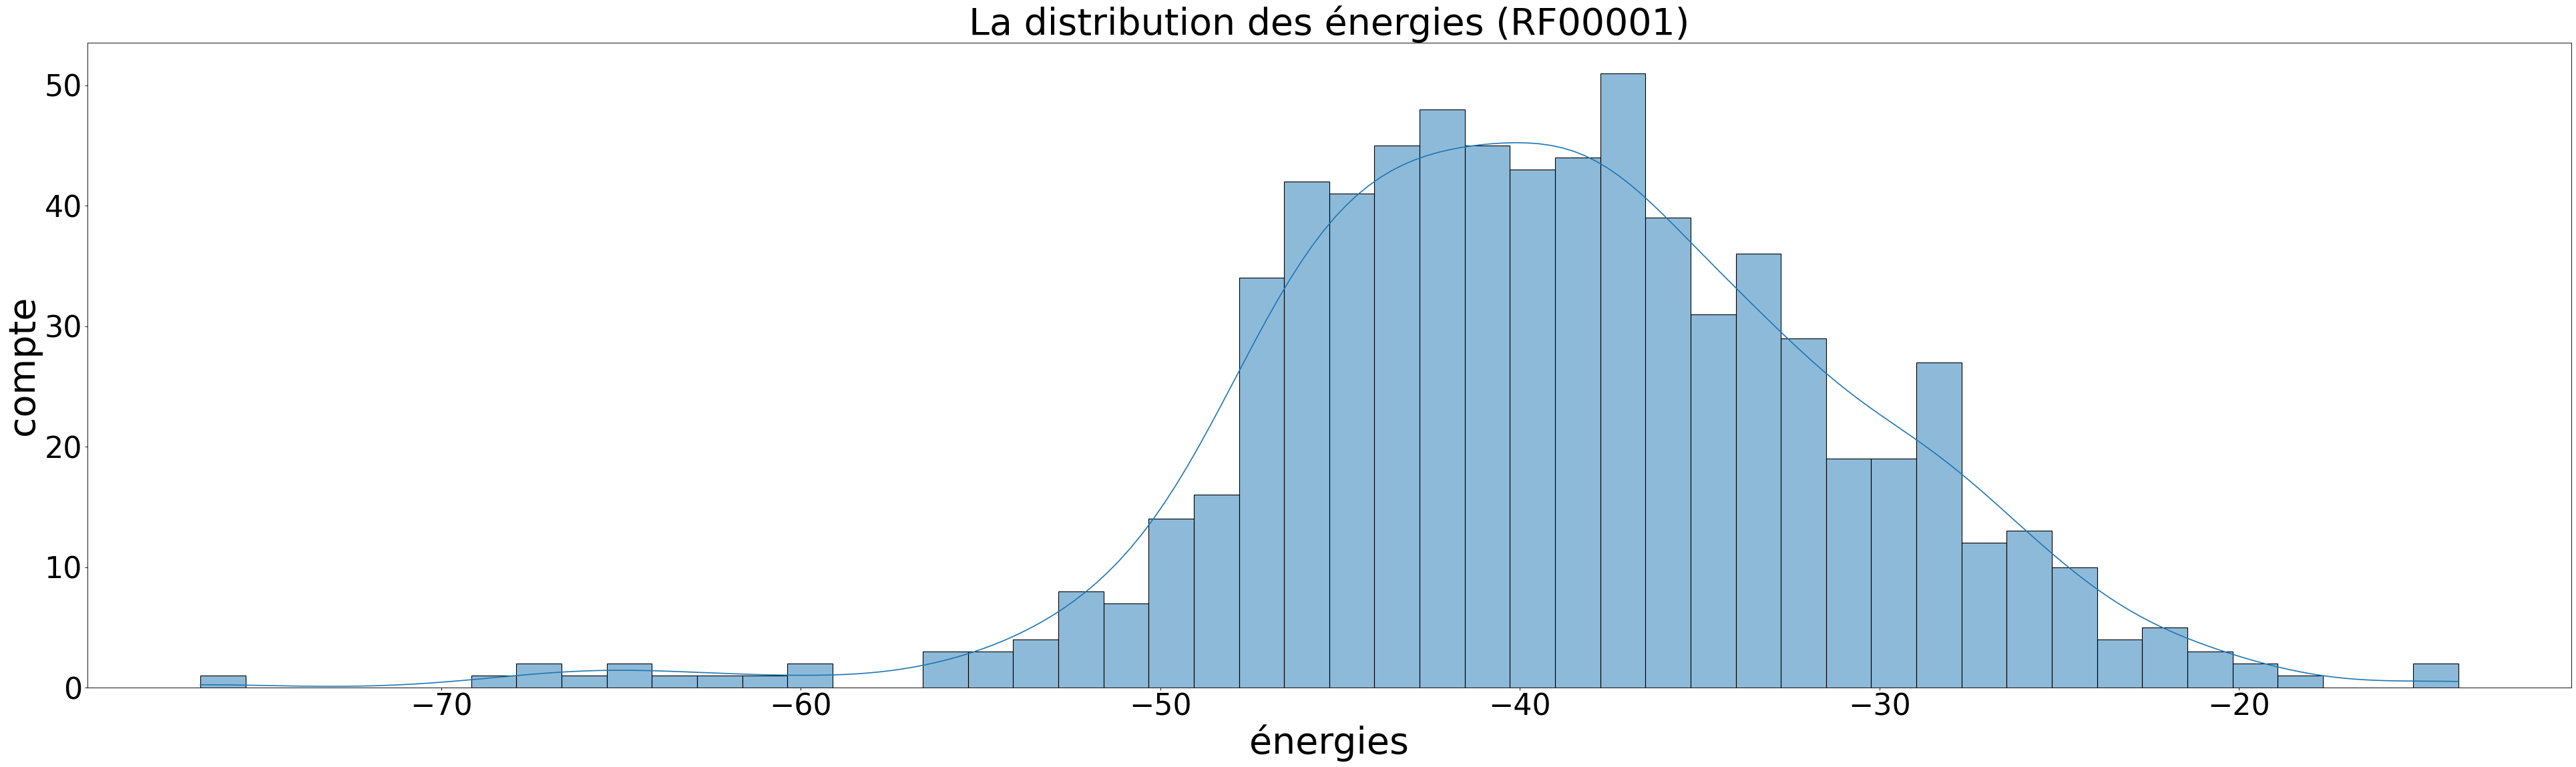

In [ ]:
# Faire la figure
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure()

figure(num=None, figsize=(60, 16), dpi=80, facecolor='w', edgecolor='k')

sns.histplot(data=df_RF0001, x="energie", bins=50, kde=True)

plt.xlabel("énergies",fontsize = 50)
plt.ylabel("compte",fontsize=50)
plt.title('La distribution des énergies (RF00001)',fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

plt.savefig('energe_RF00001')
plt.show()



<Figure size 432x288 with 0 Axes>

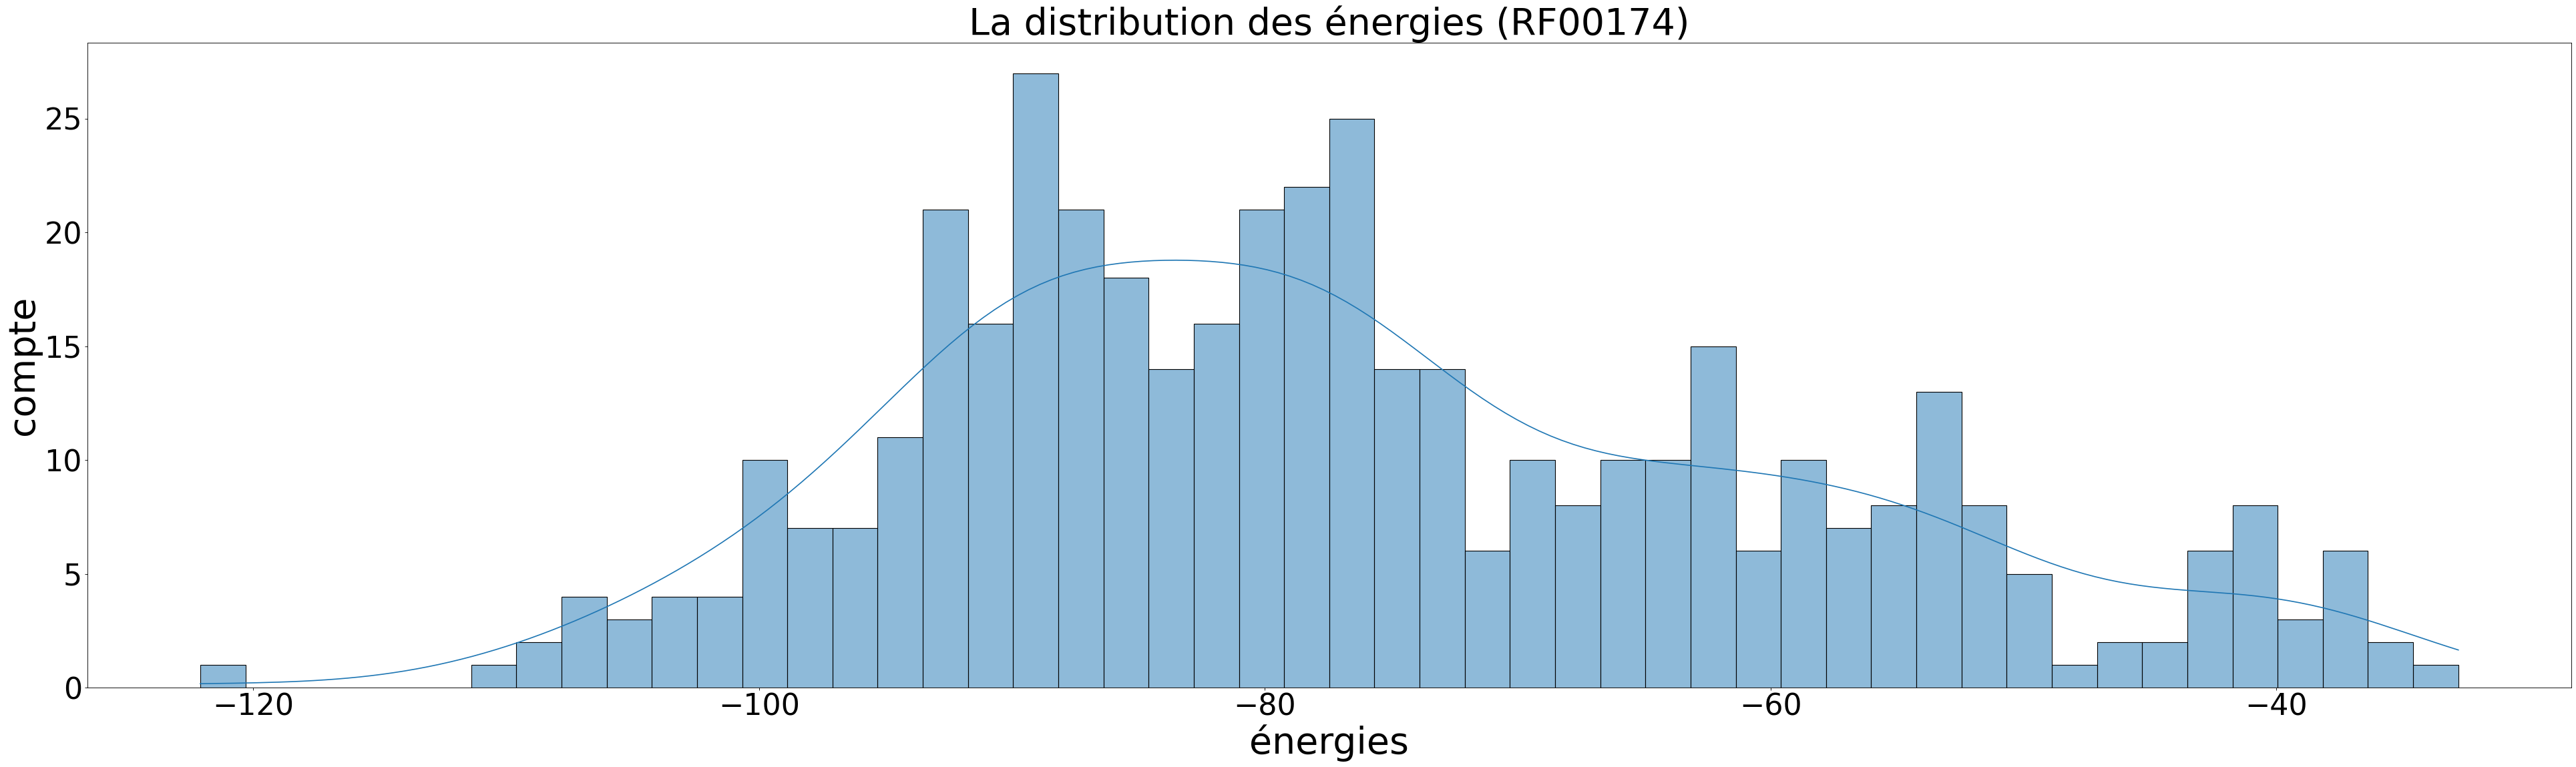

In [ ]:
# Faire la figure
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.figure()

figure(num=None, figsize=(60, 16), dpi=80, facecolor='w', edgecolor='k')

sns.histplot(data=df_RF00174, x="energie", bins=50, kde=True)

plt.xlabel("énergies",fontsize = 50)
plt.ylabel("compte",fontsize=50)
plt.title('La distribution des énergies (RF00174)',fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

plt.savefig('energe_RF00174')
plt.show()

(c) [15pts] Écrire une fonction contract(sequence, structure) 
qui prend en entrée une séquence et une structure secondaire, les deux de même longueur. 
Elle retourne la séquence et structure secondaire en enlevant les positions qui ont des gaps dans la séquence.

In [ ]:
sequence = "ACG--U"
structure = "((..))"

In [ ]:
indix_left = [i for i, x in enumerate(structure) if x == "("]
indix_left

[0, 1]

In [ ]:
indix_right = [i for i, x in enumerate(structure) if x == ")"][::-1]
indix_right

[5, 4]

In [ ]:
indix_indel = [i for i, x in enumerate(sequence) if x == "-"]
indix_indel

[3, 4]

In [ ]:
ss2tuples(structure)

[(0, 5), (1, 4)]

In [ ]:
indix_right.index(4)

1

In [ ]:
indix_left[1]

1

In [ ]:
# si Indel peut construire un paire de base "()", 
#avant de le suprimer, il faut change son partenaire de "(" ou ")" à point "." 
structure = list(structure)
for m in indix_indel:
    if m in indix_left:
        # si "-" correspond à "(" in structure
        structure[m] = '.'    # changer "(" à "."
        index_m_right = indix_left.index(m)    # chercher ")" qui correspond à "(". ils ont les meme index
        structure[indix_right[index_m_right]] = '.'  # changer ")" à "."
        
    if m in indix_right:
        # si "-" correspond à ")" in structure
        structure[m] = '.'    # changer ")" à "."
        index_m_left = indix_right.index(m)    # chercher "(" qui correspond à ")". ils ont les meme index
    
        structure[indix_left[index_m_left]] = '.'  # changer ")" à "."
        
#structure = "".join(structure)
    

In [ ]:
structure

['(', '.', '.', '.', '.', ')']

In [ ]:
# suprimer Indel dans la Structure
# supprimer plusieurs index d'une liste en même temps
newStructure = [i for j, i in enumerate(structure) if j not in indix_indel]
newStructure = "".join(newStructure)
newStructure

'(..)'

In [ ]:
# suprimer “-” dans la Sequence
newSequence = sequence.replace('-','')
newSequence

'ACGU'

In [ ]:
def contract(sequence, structure):
    indix_left = [i for i, x in enumerate(structure) if x == "("]
    indix_right = [i for i, x in enumerate(structure) if x == ")"][::-1]
    indix_indel = [i for i, x in enumerate(sequence) if x == "-"]
    ss2tuples(structure)
    
    # si Indel peut construire un paire de base "()", 
    #avant de le suprimer, il faut change son partenaire de "(" ou ")" à point "." 
    structure = list(structure)
    for m in indix_indel:
        if m in indix_left:
            # si "-" correspond à "(" in structure
            structure[m] = '.'    # changer "(" à "."
            index_m_right = indix_left.index(m)    # chercher ")" qui correspond à "(". ils ont les meme index
            structure[indix_right[index_m_right]] = '.'  # changer ")" à "."

        if m in indix_right:
            # si "-" correspond à ")" in structure
            structure[m] = '.'    # changer ")" à "."
            index_m_left = indix_right.index(m)    # chercher "(" qui correspond à ")". ils ont les meme index

            structure[indix_left[index_m_left]] = '.'  # changer ")" à "."
            
    # suprimer Indel dans la Structure
    # supprimer plusieurs index d'une liste en même temps
    newStructure = [i for j, i in enumerate(structure) if j not in indix_indel]
    newStructure = "".join(newStructure)
    
    # suprimer “-” dans la Sequence
    newSequence = sequence.replace('-','')
    
    return (newSequence,newStructure)
    

In [ ]:
contract('ACG--U', '((..))')

('ACGU', '(..)')

(d) [15pts] Pour chaque séquence et sa structure secondaire la plus stable, 
calculer (i) la fraction des paires de bases dans la structure consensus manquante dans la MFE 
et (ii) la fraction des paires de bases dans la MFE qui ne sont pas présente dans la structure consensus. 
Faire un “scatter plot” par famille, tel que pour chaque séquence sa valeur sur l’axe des X est celle calculée en i et sa valeur sur l’axe des Y est celle calculée en (ii).
Attention aux gaps.


In [ ]:
def contract(sequence, structure):
    indix_left = [i for i, x in enumerate(structure) if x == "("]
    indix_right = [i for i, x in enumerate(structure) if x == ")"][::-1]
    indix_indel = [i for i, x in enumerate(sequence) if x == "_"]
    ss2tuples(structure)
    
    # si Indel peut construire un paire de base "()", 
    #avant de le suprimer, il faut change son partenaire de "(" ou ")" à point "." 
    structure = list(structure)
    for m in indix_indel:
        if m in indix_left:
            # si "-" correspond à "(" in structure
            structure[m] = '.'    # changer "(" à "."
            index_m_right = indix_left.index(m)    # chercher ")" qui correspond à "(". ils ont les meme index
            structure[indix_right[index_m_right]] = '.'  # changer ")" à "."

        if m in indix_right:
            # si "-" correspond à ")" in structure
            structure[m] = '.'    # changer ")" à "."
            index_m_left = indix_right.index(m)    # chercher "(" qui correspond à ")". ils ont les meme index

            structure[indix_left[index_m_left]] = '.'  # changer ")" à "."
            
    # suprimer Indel dans la Structure
    # supprimer plusieurs index d'une liste en même temps
    newStructure = [i for j, i in enumerate(structure) if j not in indix_indel]
    newStructure = "".join(newStructure)
    
    # suprimer “-” dans la Sequence
    newSequence = sequence.replace('_','')
    
    return (newSequence,newStructure)

In [ ]:
# pour 'RNAalifold /Users/wanlin/Desktop/RF00001.stockholm.txt'
#coper les resultats des 3a
seq_cons00001 = "__GCUGGC_GG_C_C_AU_AGC____GG_G_G_U_G___GA__________A_AC_A__________C__CCG____A_UC____CCAUCC______CGA_ACUCG_GA_AGUUAA_G_________________CGCCCUA_G_C__G___CC__GAUG____GUACUGGGG__UGGGUGAC_C_CCCUG_GGA___A___AGUA____GG_U_CG_CU__G_CCAGGC"
ss_cons00001 = "..((((((.((.(.......((....((.(.(.(......................................................................................................)))))..).)......((...((........(..((....((....).)..))...)..........)).....))....).))..).)))))."

In [ ]:
len(seq_cons00001)==len(ss_cons00001)

True

In [ ]:
# pour 'RNAalifold /Users/wanlin/Desktop/RF00174.stockholm.txt'
#coper les resultats des 3a
seq_cons00174 = 'UUAAAUUGUCCCGGUGACGGU___CCCCC________________________AAGG_______GGGGUG______AAAA__GGGAA_U_CC_G_G_UGC_______________________________AAAUCCGG_GGCUGCCC_CC_GCAACUGUAA__GC_GG__________GGAGCAACCCCCAACA_____________________________GCCACUGGGC_GUAA___________________________________________________________GC_CCGGGAAGGC___GGG__G_GG__AGGCGAUGAC__________________________________________________________________CCGC_GAGCCAGGAGACCUGCCGUCGCCCGUAGACCCACC'
ss_cons00174 = '..............(((((((...(((......................................)))...........(..((....(.((.(..........................................))).)..(((......))).....................................................................((..((((((................................................................)).))))....))..........................................................................................................))))))))))..............'

In [ ]:
len(seq_cons00174)== len(ss_cons00174)

True

In [ ]:
# structure secondaire en enlevant les positions qui ont des gaps dans la séquence.
_, ss_cons00001_sansGaps = contract(seq_cons00001, ss_cons00001)
ss_cons00001_sansGaps

'(((((((((....(((((((......................................))))).)).((.((....(..((..((....)).))..)....)).))..))))))))).'

In [ ]:
# paires de bases dans la structure consensus
ss2tuples_cons_00001 = ss2tuples(ss_cons00001_sansGaps)
print(ss2tuples_cons_00001)

[(0, 116), (1, 115), (2, 114), (3, 113), (4, 112), (5, 111), (6, 110), (7, 109), (8, 108), (13, 105), (14, 104), (15, 102), (16, 101), (17, 96), (18, 93), (19, 92), (67, 90), (68, 89), (70, 65), (71, 64), (76, 62), (79, 61), (80, 60), (83, 59), (84, 58)]


In [ ]:
# structure secondaire en enlevant les positions qui ont des gaps dans la séquence.
_, ss_cons00174_sansGaps = contract(seq_cons00174, ss_cons00174)
ss_cons00174_sansGaps

'..............((((((((((.......))).....(((...((((.........))))..(((....)))...........................((..((((((....))))))....))...............................))))))))))..............'

In [ ]:
# paires de bases dans la structure consensus
ss2tuples_cons_00174 = ss2tuples(ss_cons00174_sansGaps)
print(ss2tuples_cons_00174)

[(14, 167), (15, 166), (16, 165), (17, 164), (18, 163), (19, 162), (20, 161), (21, 160), (22, 159), (23, 158), (39, 126), (40, 125), (41, 120), (45, 119), (46, 118), (47, 117), (48, 116), (64, 115), (65, 73), (66, 72), (101, 71), (102, 61), (105, 60), (106, 59), (107, 58), (108, 33), (109, 32), (110, 31)]


In [ ]:
# dans la resultat de 3b
df_RF0001.head()

,id,structure secondaire,energie
0,X01556.1/3-118,(((((((((....((((((((....(((((((((.......))..)...,-33.5
1,X55260.1/3-119,..(((((((......((.(((......)))..)).....(((.......,-42.4
2,M16174.1/3-119,..((((((((((.(.(((.(((.....))).)))).)))(((.......,-47.0
3,X55267.1/3-119,..(((((((....((((((((.....((((((.............)...,-43.2
4,M16172.1/3-119,..(((((((.........(((......))).((((..(((((.......,-42.3


In [ ]:
len(df_RF0001)

712

In [ ]:
df_RF0001['structure secondaire']

0      (((((((((....((((((((....(((((((((.......))..)...
1      ..(((((((......((.(((......)))..)).....(((.......
2      ..((((((((((.(.(((.(((.....))).)))).)))(((.......
3      ..(((((((....((((((((.....((((((.............)...
4      ..(((((((.........(((......))).((((..(((((.......
                             ...                        
707    (((((((((...(((((((((..(((.(((((............))...
708    ....((((....))))(((((...(((((((((.......((.......
709    .(((((....)))))..........((((.(..(((..(..(((((...
710    (((((.(((((((....))))...((((.((((.......)))).)...
711    ((((((((.(((..........(((((((.(((...))).).))))...
Name: structure secondaire, Length: 712, dtype: object

In [ ]:
#(i) la fraction des paires de bases dans la structure consensus manquante dans la MFE
#Faire un “scatter plot” par famille, 
#tel que pour chaque séquence sa valeur sur l’axe des X est celle calculée en i

In [ ]:
ss_seq_00001 = df_RF0001['structure secondaire'][0]
ss_seq_00001

'(((((((((....((((((((....(((((((((.......))..))))..)))...)))))).))(((.........((((((...)))))).........))).))))))))).'

In [ ]:
ss2tuples_seq_00001 = ss2tuples(ss_seq_00001)
print(ss2tuples_seq_00001)

[(0, 114), (1, 113), (2, 112), (3, 111), (4, 110), (5, 109), (6, 108), (7, 107), (8, 106), (13, 104), (14, 103), (15, 102), (16, 92), (17, 91), (18, 90), (19, 89), (20, 88), (25, 87), (26, 65), (27, 64), (28, 62), (29, 61), (30, 60), (31, 59), (32, 58), (33, 57), (66, 53), (67, 52), (68, 51), (78, 48), (79, 47), (80, 46), (81, 45), (82, 42), (83, 41)]


In [ ]:
len(ss2tuples_cons_00001)

25

In [ ]:
len(ss2tuples_seq_00001)

35

In [ ]:
set_cons_00001 = set(ss2tuples_cons_00001)
set_seq_00001 = set(ss2tuples_seq_00001)
set_cons_00001.intersection(set_seq_00001)

{(15, 102)}

In [ ]:
print(set_seq_00001.union(set_cons_00001))

{(3, 111), (5, 111), (18, 90), (32, 58), (68, 51), (1, 113), (33, 57), (2, 112), (81, 45), (18, 93), (17, 91), (80, 46), (14, 104), (31, 59), (67, 52), (3, 113), (4, 112), (8, 106), (16, 92), (27, 64), (0, 114), (79, 47), (15, 102), (30, 60), (66, 53), (13, 105), (1, 115), (16, 101), (6, 108), (2, 114), (7, 107), (26, 65), (84, 58), (29, 61), (71, 64), (78, 48), (14, 103), (17, 96), (83, 41), (68, 89), (5, 109), (80, 60), (8, 108), (83, 59), (13, 104), (28, 62), (70, 65), (82, 42), (0, 116), (20, 88), (6, 110), (67, 90), (7, 109), (76, 62), (79, 61), (19, 89), (19, 92), (25, 87), (4, 110)}


In [ ]:
len(set_seq_00001.union(set_cons_00001))

59

In [ ]:
#(i) la fraction des paires de bases dans la structure consensus manquante dans la MFE
#Faire un “scatter plot” par famille, 
#tel que pour chaque séquence sa valeur sur l’axe des X est celle calculée en i

def fractionCons_MFE(df_sample,ss2tuple_cons):
    fraction_x = []
    fraction_y = []
    for i in range(len(df_sample)):
        ss_seq = df_sample['structure secondaire'][i]
        ss2tuples_seq = ss2tuples(ss_seq) # des paires de bases dans la MFE
        total_ss = set(ss2tuples_seq).union(set(ss2tuple_cons))  #calculer l'Union de deux listes
        #(i) la fraction des paires de bases dans la structure consensus manquante dans la MFE
        fractionX = len((total_ss - set(ss2tuples_seq)))/len(ss2tuple_cons)
        fraction_x.append(fractionX)
        
# (ii) la fraction des paires de bases dans la MFE qui ne sont pas présente dans la structure consensus.
        fractionY = len((total_ss - set(ss2tuple_cons)))/len(ss2tuples_seq)
        fraction_y.append(fractionY)
    
    return (fraction_x,fraction_y)
    

In [ ]:
x_00001,y_00001 = fractionCons_MFE(df_RF0001,ss2tuples_cons_00001)
print(len(x_00001)==len(y_00001))
x_00001[1:10]                         

True


[1.0, 1.0, 0.96, 1.0, 1.0, 1.0, 0.76, 1.0, 1.0]

In [ ]:
y_00001[1:10]

[1.0, 1.0, 0.96875, 1.0, 1.0, 1.0, 0.8235294117647058, 1.0, 1.0]

In [ ]:
len(x_00001)

712

<Figure size 432x288 with 0 Axes>

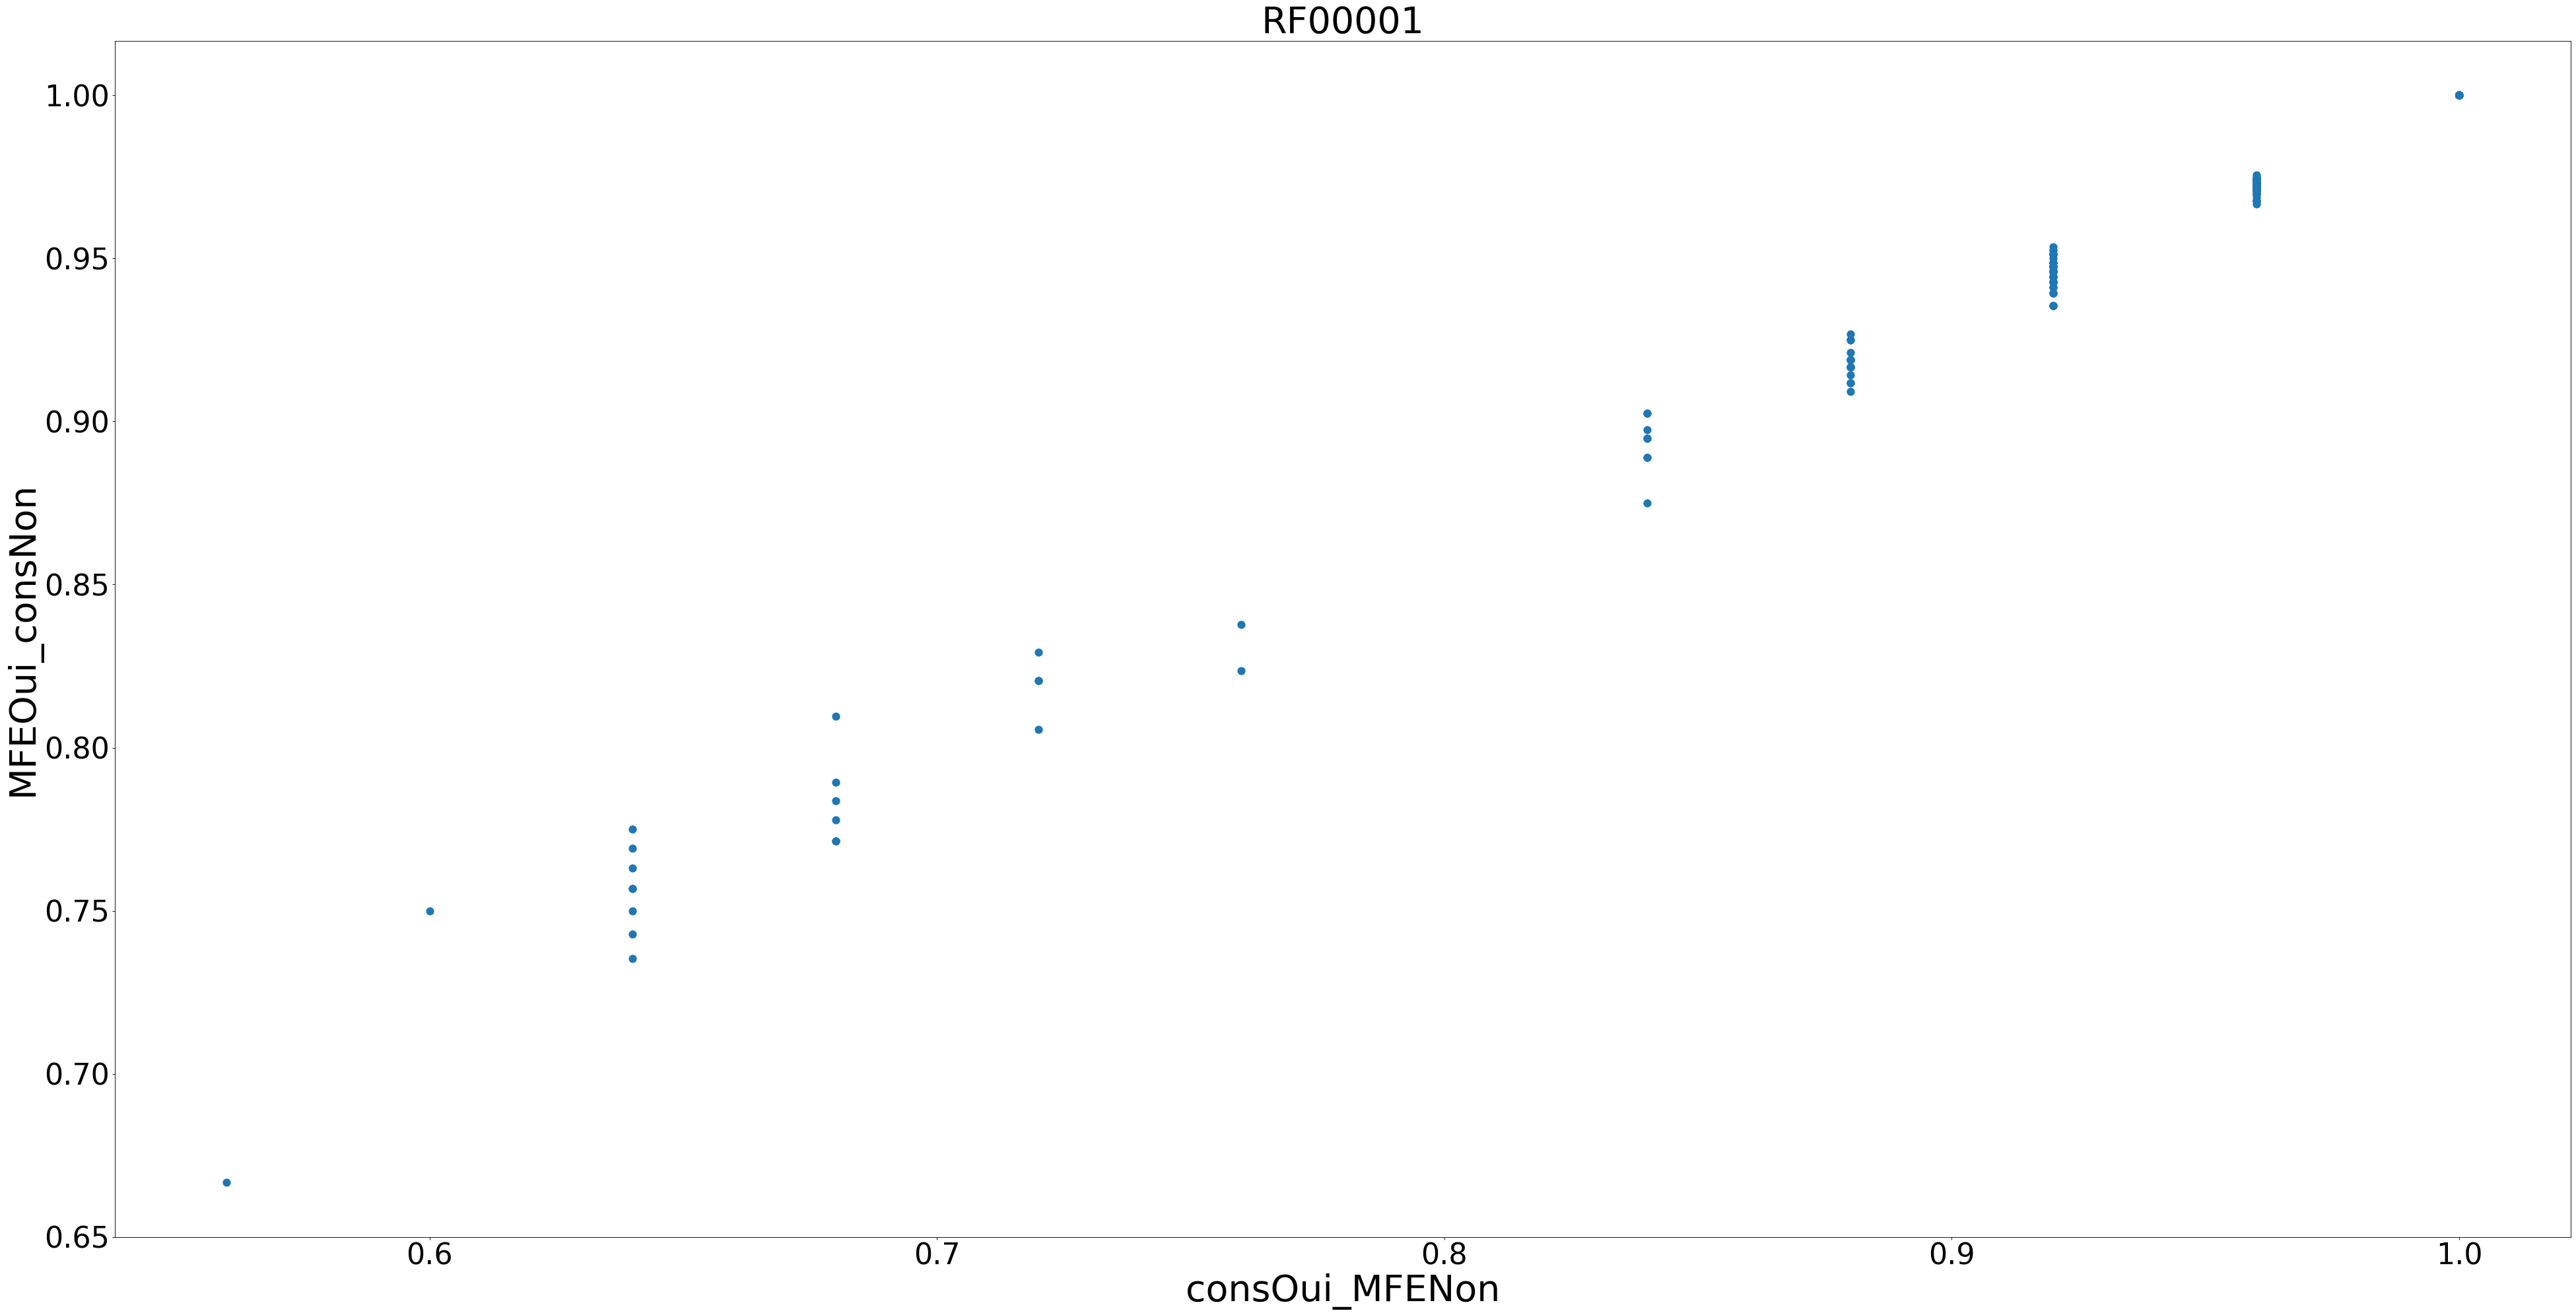

In [ ]:
# Faire la figure
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = np.array(x_00001)
y = np.array(y_00001)

plt.figure()

figure(num=None, figsize=(60, 30), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x,y,s=100)

plt.xlabel("consOui_MFENon",fontsize = 50)
plt.ylabel("MFEOui_consNon",fontsize=50)
plt.title('RF00001',fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

plt.savefig('scatter_RF00001')
plt.show()

In [ ]:
# dans la resultat de 3b
df_RF00174.head()

,id,structure secondaire,energie
0,AF010496.1/39869-39652,((((.((((((((....((((((((((((..((...))..))))))...,-90.1
1,AF010496.1/105318-105541,.......((((((..((.((((((((((....))))))...........,-97.2
2,AF010496.1/116971-117194,((.((.(((...(((((((((((((........))))......(((...,-88.2
3,AF193754.1/4343-4142,.((((((.(((((((....))))))).))))))................,-58.3
4,AF193754.1/24966-24788,((((......((((((((((((((((((....)))))).....((....,-61.2


In [ ]:
df_RF00174['structure secondaire']

0      ((((.((((((((....((((((((((((..((...))..))))))...
1      .......((((((..((.((((((((((....))))))...........
2      ((.((.(((...(((((((((((((........))))......(((...
3      .((((((.(((((((....))))))).))))))................
4      ((((......((((((((((((((((((....)))))).....((....
                             ...                        
425    (((((((......)).))))).((((((....)))))).((.(((....
426    ((((((((..(((....(((((..(((((((......))))))).....
427    ..((((....((((((((((((((........)))......(((.....
428    ..............(((..(((((((......)))))))......(...
429    ........((((((((..((((..(((((((......))))))).....
Name: structure secondaire, Length: 430, dtype: object

In [ ]:
x_00174,y_00174 = fractionCons_MFE(df_RF00174,ss2tuples_cons_00174)
print(len(x_00174)==len(y_00174))
x_00174[1:10]     

True


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8928571428571429, 1.0, 1.0]

In [ ]:
y_00174[1:10]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9433962264150944, 1.0, 1.0]

<Figure size 432x288 with 0 Axes>

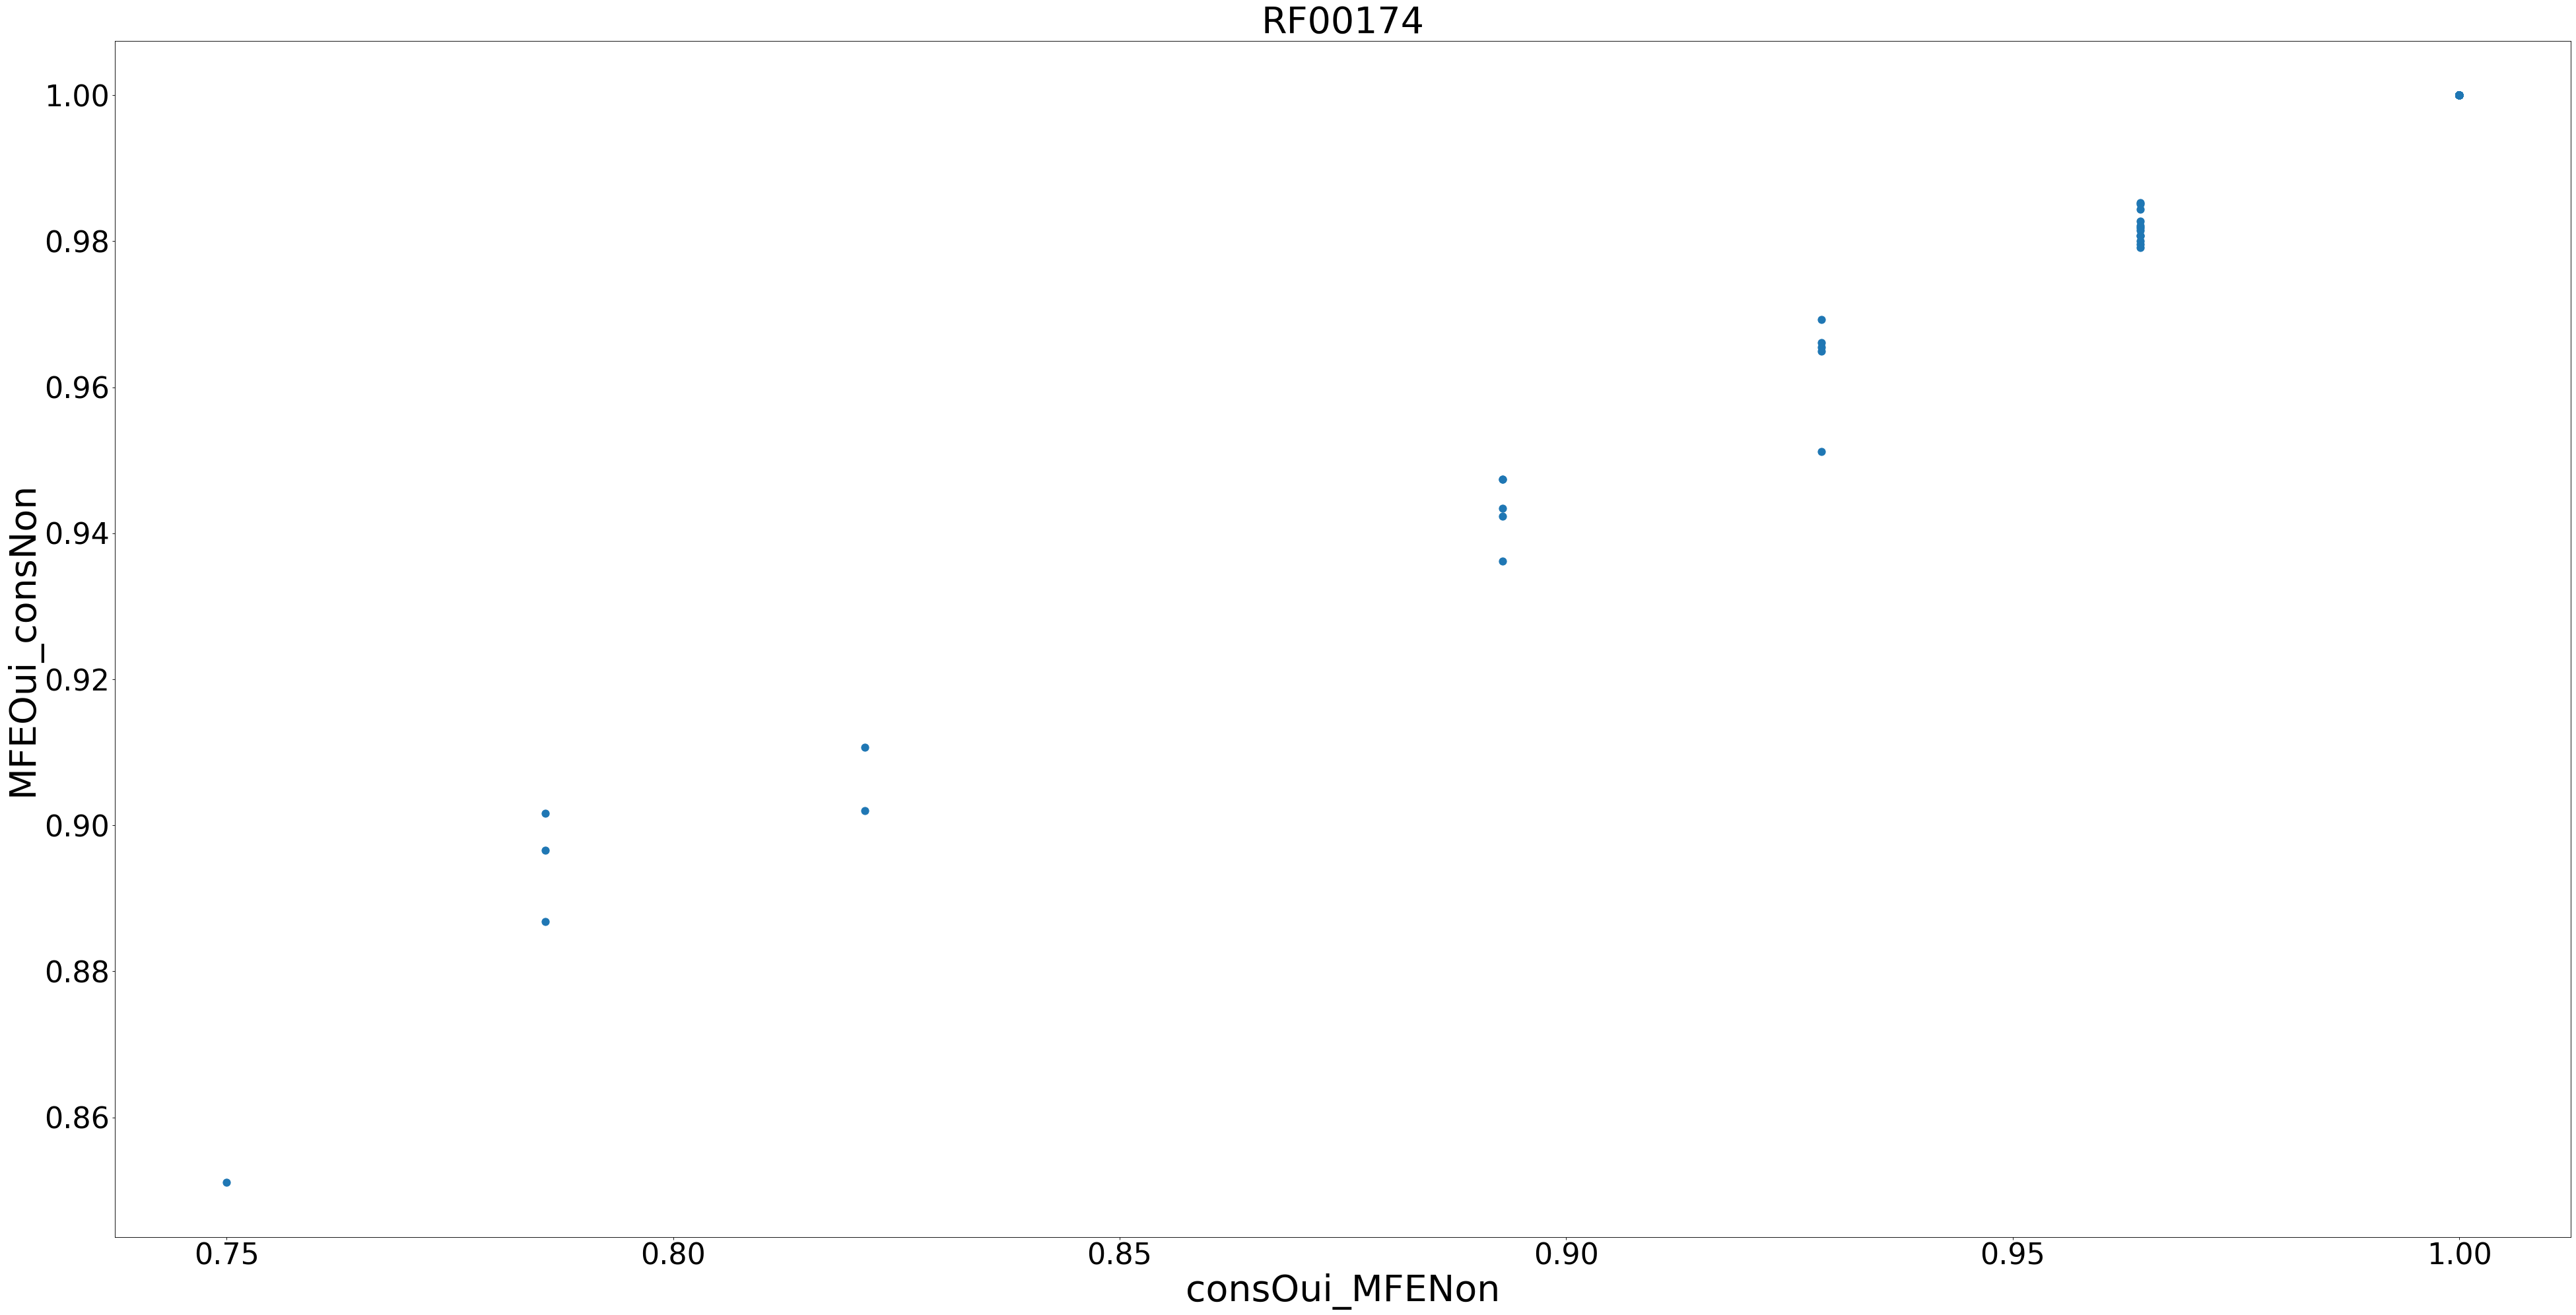

In [ ]:
# Faire la figure
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = np.array(x_00174)
y = np.array(y_00174)

plt.figure()

figure(num=None, figsize=(60, 30), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(x,y,s=100)

plt.xlabel("consOui_MFENon",fontsize = 50)
plt.ylabel("MFEOui_consNon",fontsize=50)
plt.title('RF00174',fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)

plt.savefig('scatter_RF00174')
plt.show()

4. [20pts]
(a) [5pts] Créer 3 structures secondaires avec les contraintes suivantes:
i. Taille 50
ii. Une sans jonction, une avec une jonction à trois brins, et une avec une jonction à quatre brins
iii. Au moins 50% et au plus 80% des positions doivent être dans une paire de base

In [ ]:
ss0 = '(.(.(.(.(.(.(.(.(.(.(.(.().).).).).).).).).).).).)'

In [ ]:
len(ss0)

50

In [ ]:
1-ss0.count('.')/50

0.52

In [ ]:
ss1_3 = "(....((((()))))....(((((()))))).....((((()))))...)"

In [ ]:
len(ss1_3)

50

In [ ]:
1-ss1_3.count('.')/50

0.6799999999999999

In [ ]:
ss1_4 = "((((....(((())))....(((()))).....((((()))))...))))"

In [ ]:
len(ss1_4)

50

In [ ]:
1-ss1_4.count('.')/50

0.6799999999999999

(b) [10pts] Échantillonner, avec RNAinverse 500 séquences pour chaque structure, et calculer la distribution des distances entre la structure MFE et la structure désirée.

In [ ]:
output_ss0 = run(['RNAinverse','-R500'], input=ss0, capture_output=True, text=True)

In [ ]:
print(output_ss0.stdout)

ACGGUUGGCGUGGGCGUGCGCAGUCGUCAGAGGGGGGUCGGGACAAAUGU   33   d= 5
CUCGAAUUUCGGCGGGCGGGUGGGUAGCGGGUAGGUGGUUCAGAUUGGCG   35   d= 5
GACUUGAGGCUGGAUUCUGAUCCUCGUGGGCCCGCAUUCGACGUGAAGCC   32   d= 6
CCGGAGGGUUCUAGGAAAGGGUGUCGUCGUGUUUGCGUGGUGGUGUGUUG   22   d= 5
CAUGUAUUUGUCAGGAUUUAGAAGCGGUUCGAAAACGUCAGAAAUGGGAG   28   d= 6
CACUCUCCCUAAACGUCCUUGGUGCGGAUCGAUGUCCUUUUGUGCGAGCG   26   d= 6
GGGGUGUCGGUGGAUUUAAGGGGGCGGUGUGUAAAAACGGGUGGGAGUGC   32   d= 3
UCUUCUGAAUUGUAGGACCAUGAGGCGUCGAGAUGCAAUAGUACGGCACG   24   d= 7
GAUCGGUGGGUGGUUCUUCAGGCGCGGGACGGGAAAACAAGUGAGUGACC   34   d= 6
GGGUCAAAUUUGUAUGCGUGGACGGUGGGUGAGGGAAAGAAAGUUGUCGC   37   d= 3
GCGCGGCGUGAAUGUGUGUGGCAGUAGUUCGGGGGACGCUGAUGGUGCAC   35   d= 6
CGAGUGUGGUUGCGUGGCGUCUCGCGGGGGUCUUUAGGGGUUGGGAGUGG   31   d= 3
GGAGUUUGAAUGCGCGUGUGAUGGCGGCUUGGGGGGGGGAUUGGUAGUGC   33   d= 2
CUGUUGUAAGUGCAUGAGCGUGGUCGUCGAGGUUGGGGGGGUAGGGGCCG   27   d= 4
CGUCGAUGUGUGUUUAUAGGGCGGGCGCGUUUCAUGUAGGGGAAUCAAUG   30   d= 6
GUGUCGCAAUUUACUACGUGAGCGCGGGUUUGGGAAAUAAUUUGAGUCUC   29

In [ ]:
# string --->  list; séparer les échantillons 
output_ss0.stdout.split('\n')[-2]

'CACCGCUCAUAAAUUUUAGUCUCUCGUGCGCCCAAACUUUUUGAACUGUG   27   d= 5'

In [ ]:
output_ss0.stdout.split('\n')[-1]  # il faut supprimer ce dernier item

''

In [ ]:
output_ss0.stdout.split('\n')[0].split('d= ')[1]

'5'

In [ ]:
distance_RNAinverse = []
# string --->  list; séparer les échantillons 
RNAinverse_output = output_ss0.stdout.split('\n')
RNAinverse_output.pop()  # le denier item est ''. Donc, il faut le enlever
for seq in RNAinverse_output:
    distance = seq.split('d= ')[1]   #rendre le numéro après "d= "
    distance_RNAinverse.append(int(distance))
    
print(distance_RNAinverse)

[5, 5, 6, 5, 6, 6, 3, 7, 6, 3, 6, 3, 2, 4, 6, 7, 3, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 4, 5, 6, 4, 5, 6, 5, 6, 3, 3, 1, 4, 5, 5, 4, 6, 5, 5, 5, 4, 5, 5, 5, 5, 3, 2, 2, 5, 5, 3, 4, 4, 2, 3, 3, 2, 3, 6, 5, 4, 5, 6, 4, 6, 4, 3, 3, 4, 4, 6, 6, 5, 3, 5, 5, 4, 5, 5, 4, 7, 5, 6, 5, 3, 2, 3, 4, 4, 5, 4, 6, 4, 4, 5, 5, 6, 5, 2, 4, 5, 3, 5, 7, 3, 4, 3, 5, 6, 4, 2, 5, 3, 5, 5, 4, 6, 6, 6, 7, 9, 5, 3, 5, 6, 4, 4, 6, 3, 4, 3, 5, 6, 4, 4, 5, 4, 6, 5, 4, 4, 3, 6, 5, 6, 6, 5, 6, 2, 5, 3, 5, 4, 3, 5, 5, 4, 4, 5, 3, 6, 4, 2, 6, 4, 5, 6, 4, 5, 6, 5, 4, 3, 5, 3, 4, 5, 5, 4, 2, 5, 6, 4, 5, 6, 6, 3, 5, 5, 5, 4, 3, 5, 5, 5, 6, 1, 6, 3, 3, 5, 5, 4, 4, 2, 4, 5, 4, 6, 3, 5, 5, 6, 4, 4, 4, 3, 5, 6, 5, 3, 4, 5, 4, 5, 2, 4, 1, 3, 5, 3, 3, 4, 6, 5, 3, 1, 5, 3, 5, 4, 18, 4, 5, 6, 3, 4, 2, 3, 5, 5, 5, 4, 4, 6, 5, 4, 5, 5, 6, 4, 6, 2, 4, 5, 4, 3, 4, 3, 4, 1, 2, 3, 4, 4, 4, 4, 3, 5, 6, 1, 6, 5, 6, 3, 6, 3, 5, 4, 5, 6, 3, 1, 5, 5, 3, 4, 7, 3, 5, 4, 5, 4, 5, 7, 2, 4, 5, 3, 4, 3, 3, 7, 4, 2, 3, 5, 3, 2, 4, 5, 3, 3, 4, 4, 2, 3,

In [ ]:
len(RNAinverse_output)

500

In [ ]:
def get_distance(output_RNAinverse):
    distance_RNAinverse = []
    # string --->  list; séparer les échantillons 
    RNAinverse_output = output_RNAinverse.stdout.split('\n')
    RNAinverse_output.pop()  # le denier item est ''. Donc, il faut le enlever
    for seq in RNAinverse_output:
        distance = seq.split('d= ')[1]   #rendre le numéro après "d= "
        distance_RNAinverse.append(int(distance))
        
    return distance_RNAinverse

In [ ]:
distances_ss0 = get_distance(output_ss0)
print(distances_ss0)

[5, 5, 6, 5, 6, 6, 3, 7, 6, 3, 6, 3, 2, 4, 6, 7, 3, 5, 5, 4, 5, 3, 5, 5, 5, 5, 5, 4, 5, 6, 4, 5, 6, 5, 6, 3, 3, 1, 4, 5, 5, 4, 6, 5, 5, 5, 4, 5, 5, 5, 5, 3, 2, 2, 5, 5, 3, 4, 4, 2, 3, 3, 2, 3, 6, 5, 4, 5, 6, 4, 6, 4, 3, 3, 4, 4, 6, 6, 5, 3, 5, 5, 4, 5, 5, 4, 7, 5, 6, 5, 3, 2, 3, 4, 4, 5, 4, 6, 4, 4, 5, 5, 6, 5, 2, 4, 5, 3, 5, 7, 3, 4, 3, 5, 6, 4, 2, 5, 3, 5, 5, 4, 6, 6, 6, 7, 9, 5, 3, 5, 6, 4, 4, 6, 3, 4, 3, 5, 6, 4, 4, 5, 4, 6, 5, 4, 4, 3, 6, 5, 6, 6, 5, 6, 2, 5, 3, 5, 4, 3, 5, 5, 4, 4, 5, 3, 6, 4, 2, 6, 4, 5, 6, 4, 5, 6, 5, 4, 3, 5, 3, 4, 5, 5, 4, 2, 5, 6, 4, 5, 6, 6, 3, 5, 5, 5, 4, 3, 5, 5, 5, 6, 1, 6, 3, 3, 5, 5, 4, 4, 2, 4, 5, 4, 6, 3, 5, 5, 6, 4, 4, 4, 3, 5, 6, 5, 3, 4, 5, 4, 5, 2, 4, 1, 3, 5, 3, 3, 4, 6, 5, 3, 1, 5, 3, 5, 4, 18, 4, 5, 6, 3, 4, 2, 3, 5, 5, 5, 4, 4, 6, 5, 4, 5, 5, 6, 4, 6, 2, 4, 5, 4, 3, 4, 3, 4, 1, 2, 3, 4, 4, 4, 4, 3, 5, 6, 1, 6, 5, 6, 3, 6, 3, 5, 4, 5, 6, 3, 1, 5, 5, 3, 4, 7, 3, 5, 4, 5, 4, 5, 7, 2, 4, 5, 3, 4, 3, 3, 7, 4, 2, 3, 5, 3, 2, 4, 5, 3, 3, 4, 4, 2, 3,

In [ ]:
output_ss1_3 = run(['RNAinverse','-R500'], input=ss1_3, capture_output=True, text=True)

In [ ]:
distances_ss1_3 = get_distance(output_ss1_3)
print(distances_ss1_3)

[8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 8, 7, 9, 8, 7, 11, 8, 8, 10, 8, 17, 7, 7, 7, 18, 7, 11, 7, 8, 8, 8, 7, 13, 7, 8, 7, 8, 7, 8, 17, 7, 8, 8, 7, 8, 7, 8, 8, 11, 7, 9, 7, 7, 7, 7, 9, 8, 7, 7, 7, 9, 8, 10, 7, 9, 8, 7, 7, 7, 9, 9, 18, 9, 7, 7, 7, 8, 7, 7, 7, 8, 7, 14, 8, 9, 8, 8, 19, 9, 8, 8, 7, 8, 14, 8, 7, 7, 7, 9, 8, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 8, 9, 9, 9, 10, 18, 7, 8, 7, 10, 17, 8, 7, 7, 7, 8, 9, 7, 9, 16, 8, 7, 7, 7, 7, 18, 9, 7, 7, 8, 7, 7, 10, 7, 7, 11, 7, 7, 8, 8, 10, 7, 7, 11, 17, 8, 7, 11, 9, 7, 7, 8, 9, 8, 8, 7, 8, 8, 7, 9, 7, 8, 8, 7, 8, 7, 7, 7, 8, 15, 9, 7, 8, 17, 7, 8, 10, 8, 8, 8, 8, 9, 9, 8, 9, 7, 8, 9, 14, 7, 8, 7, 8, 7, 9, 14, 14, 9, 7, 11, 10, 8, 8, 9, 7, 18, 7, 8, 10, 8, 8, 7, 9, 8, 7, 9, 9, 10, 10, 7, 10, 7, 10, 7, 8, 8, 7, 7, 10, 8, 13, 8, 8, 7, 7, 8, 8, 9, 8, 14, 8, 8, 8, 9, 10, 7, 8, 7, 8, 7, 7, 14, 7, 7, 7, 7, 9, 11, 7, 8, 10, 8, 7, 9, 8, 7, 8, 9, 7, 7, 7, 7, 7, 7, 7, 8, 7, 9, 7, 8, 7, 13, 7, 7, 11, 7, 8, 8, 8, 7, 7, 7, 9, 11, 8, 9, 7, 9, 18, 14, 7, 7, 7, 10, 9, 10

In [ ]:
len(distances_ss1_3)

500

In [ ]:
output_ss1_4 = run(['RNAinverse','-R500'], input=ss1_4, capture_output=True, text=True)

In [ ]:
distances_ss1_4 = get_distance(output_ss1_4)
print(distances_ss1_4)

[15, 13, 9, 14, 16, 8, 8, 20, 13, 9, 15, 12, 11, 18, 16, 8, 10, 15, 14, 18, 13, 11, 11, 14, 16, 8, 16, 6, 7, 11, 7, 13, 6, 8, 16, 8, 12, 14, 8, 15, 9, 14, 7, 8, 12, 16, 8, 8, 13, 9, 15, 11, 9, 8, 17, 7, 14, 8, 7, 12, 17, 8, 10, 9, 7, 9, 7, 10, 14, 9, 9, 7, 14, 12, 13, 15, 18, 14, 13, 13, 13, 7, 17, 9, 8, 12, 7, 15, 12, 7, 19, 7, 8, 18, 7, 11, 15, 15, 13, 14, 13, 9, 9, 12, 15, 16, 17, 17, 14, 7, 7, 11, 9, 11, 11, 7, 9, 12, 12, 15, 9, 17, 14, 7, 19, 9, 18, 7, 15, 20, 8, 9, 7, 8, 13, 13, 9, 8, 19, 11, 9, 9, 11, 15, 15, 8, 10, 11, 18, 8, 15, 8, 9, 9, 11, 15, 18, 14, 14, 14, 7, 8, 8, 13, 14, 8, 14, 14, 9, 9, 9, 8, 8, 12, 17, 16, 9, 17, 16, 7, 11, 7, 7, 9, 11, 11, 9, 12, 16, 14, 8, 7, 7, 7, 8, 9, 17, 8, 15, 17, 7, 14, 12, 14, 15, 14, 8, 13, 7, 9, 7, 18, 9, 14, 9, 14, 16, 11, 13, 7, 19, 9, 13, 10, 14, 8, 16, 10, 14, 8, 9, 9, 7, 16, 9, 9, 17, 9, 20, 17, 7, 12, 10, 9, 13, 12, 9, 8, 8, 14, 14, 16, 14, 8, 17, 13, 12, 6, 12, 11, 13, 17, 20, 15, 9, 15, 9, 8, 8, 14, 9, 15, 14, 8, 12, 9, 8, 11, 12, 8

(c) [5pts] Discuter en quelques phrases des résultats obtenus. Pensez- vous que la jonction influence les résultats, si oui comment et si non pourquoi?

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
def compare_2_groups(arr_1, arr_2,alpha):
    stat, p = ttest_ind(arr_1, arr_2,equal_var = False)
    #If equal_var False, perform Welch’s t-test, which does not assume equal population variance
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
distances_ss0 = np.array(distances_ss0)
distances_ss1_3 = np.array(distances_ss1_3)
distances_ss1_4 = np.array(distances_ss1_4)

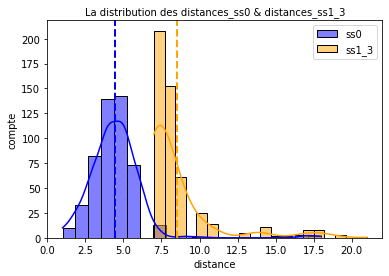

In [ ]:
plt.figure()

ax1 = sns.histplot(distances_ss0,color='b',kde=True,label="ss0",bins=20)
ax2 = sns.histplot(distances_ss1_3,color='orange',kde=True,label="ss1_3",bins=20)
plt.axvline(np.mean(distances_ss0), color='b', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(distances_ss1_3), color='orange', linestyle='dashed', linewidth=2)


plt.xlabel("distance",fontsize = 10)
plt.ylabel("compte",fontsize=10)
plt.title('La distribution des distances_ss0 & distances_ss1_3',fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.legend()
plt.savefig('La distribution des distances_ss0 & distances_ss1_3')
plt.show()

In [ ]:
from statistics import variance

In [ ]:
variance(distances_ss0)

3

In [ ]:
variance(distances_ss1_3)

6

In [ ]:
variance(distances_ss1_4)

12

In [ ]:
compare_2_groups(distances_ss0, distances_ss1_3,0.05)

Statistics=-29.254, p=0.000
Different distributions (reject H0)


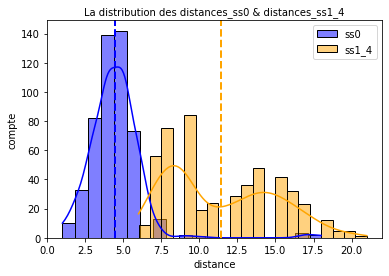

In [ ]:
plt.figure()

ax1 = sns.histplot(distances_ss0,color='b',kde=True,label="ss0",bins =20)
ax2 = sns.histplot(distances_ss1_4,color='orange',kde=True,label="ss1_4",bins = 20)
plt.axvline(np.mean(distances_ss0), color='b', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(distances_ss1_4), color='orange', linestyle='dashed', linewidth=2)


plt.xlabel("distance",fontsize = 10)
plt.ylabel("compte",fontsize=10)
plt.title('La distribution des distances_ss0 & distances_ss1_4',fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.legend()
plt.savefig('La distribution des distances_ss0 & distances_ss1_4')
plt.show()

In [ ]:
compare_2_groups(distances_ss0, distances_ss1_4,0.05)

Statistics=-38.561, p=0.000
Different distributions (reject H0)


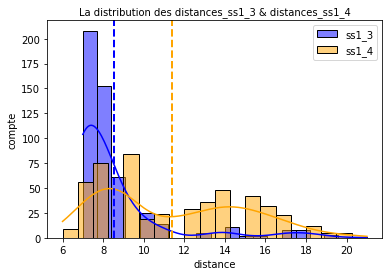

In [ ]:
plt.figure()

ax1 = sns.histplot(distances_ss1_3,color='b',kde=True,label="ss1_3", bins=20)
ax2 = sns.histplot(distances_ss1_4,color='orange',kde=True,label="ss1_4", bins=20)
plt.axvline(np.mean(distances_ss1_3), color='b', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(distances_ss1_4), color='orange', linestyle='dashed', linewidth=2)


plt.xlabel("distance",fontsize = 10)
plt.ylabel("compte",fontsize=10)
plt.title('La distribution des distances_ss1_3 & distances_ss1_4',fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.legend()
plt.savefig('La distribution des distances_ss1_3 & distances_ss1_4')
plt.show()

In [ ]:
compare_2_groups(distances_ss1_3, distances_ss1_4,0.05)

Statistics=-14.839, p=0.000
Different distributions (reject H0)
